In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


number of points : 9999


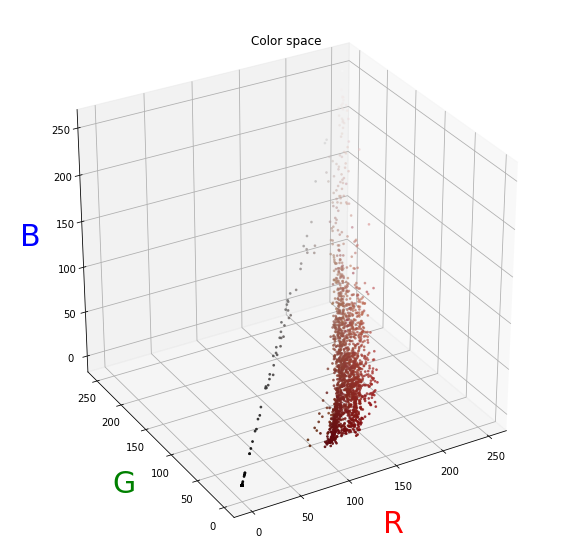

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def show_image_3d(image, max_count=5000):

# 이미지가 매우 클 경우를 대비하여 그래프에 표현될 점의 개수를 조정함.
    count = image.shape[0] * image.shape[1]
    rate = 1
    if count > max_count:
        rate = math.sqrt(max_count / count)
    image = cv2.resize(image, dsize=(0, 0), fx=rate, fy=rate)

# opencv에서는 BGR로 이미지를 읽으므로 RGB채널로 변환해줌.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
# 2차원 형식의 이미지를 1차원 배열로 변환함.
    data = np.reshape(image, (-1, 3))

    print('number of points :', len(data))

# 채널 분리.
    rs = data[:, 0]
    gs = data[:, 1]
    bs = data[:, 2]

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

# 색 값(c)이 0에서 1 사이로 표현되기 때문에, 255로 나누어줌.
    ax.scatter(xs=rs, ys=gs, zs=bs, s=3, c=data / 255)

    ax.set_title('Color space')  # 타이틀
    ax.set_xlabel('R', labelpad=15, color='red', size=30)  # x 레이블
    ax.set_ylabel('G', labelpad=15, color='green', size=30)  # y 레이블
    ax.set_zlabel('B', labelpad=15, color='blue', size=30)  # z 레이블

# 그래프를 보는 시점. elev는 고도, azim은 좌우 각도.
    ax.view_init(elev=30, azim=-120)

# 그래프 표시
    plt.show()

#사용 예시
show_image_3d(cv2.imread('red_black.png'), max_count=10000)

In [ ]:
# 